## TensorFlow implementation of CNN

In TensorFlow, each input image is typically represented as a 3D tensor of shape [height, width, channels]. A mini-batch is represented as a 4D tensor of shape [mini-batch size, height, width, channels]. The weights of a convolutional layer are represented as a 4D tensor of shape  [fh, fw, fn′, fn].The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [fn].

### All needed imports

In [1]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Let’s look at a simple example. 
The following code loads two sample images, using Scikit-Learn’s load_sample_image() (which loads two color images, one
of a Chinese temple, and the other of a flower), then it creates two filters and applies them to both images, and finally it displays one of the resulting feature maps:

##### The pixel intensity for each color channel is represented as a byte from 0 to 255, so we scale these features simply by dividing by 255, to get floats ranging from 0 to 1.

In [8]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255 
flower = load_sample_image("flower.jpg") / 255 

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [9]:
china, china.shape

(array([[[0.68235294, 0.78823529, 0.90588235],
         [0.68235294, 0.78823529, 0.90588235],
         [0.68235294, 0.78823529, 0.90588235],
         ...,
         [0.98039216, 0.98431373, 1.        ],
         [0.98039216, 0.98431373, 1.        ],
         [0.98039216, 0.98431373, 1.        ]],
 
        [[0.6745098 , 0.78039216, 0.89803922],
         [0.67843137, 0.78431373, 0.90196078],
         [0.67843137, 0.78431373, 0.90196078],
         ...,
         [0.98431373, 0.98823529, 1.        ],
         [0.98431373, 0.98823529, 1.        ],
         [0.98431373, 0.98823529, 1.        ]],
 
        [[0.68235294, 0.78823529, 0.90588235],
         [0.68235294, 0.78823529, 0.90588235],
         [0.68235294, 0.78823529, 0.90588235],
         ...,
         [0.98823529, 0.99215686, 1.        ],
         [0.98823529, 0.99215686, 1.        ],
         [0.98823529, 0.99215686, 1.        ]],
 
        ...,
 
        [[0.34509804, 0.31372549, 0.02745098],
         [0.57647059, 0.54117647, 0.27058

In [11]:
images.shape

(2, 427, 640, 3)

##### Then we create two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle).

Filters - weights of a convolutional layer are represented as a 4D tensor. fh and fw are the height and width of the receptive field, and fn′ is the number of feature maps in the previous layer

##### If set to "same", the convolutional layer uses zero padding if necessary - zeros are added as evenly as possible around the inputs, as needed.

In [19]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line 

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") 

In [20]:
outputs

<tf.Tensor: shape=(2, 427, 640, 2), dtype=float64, numpy=
array([[[[ 9.49411765,  9.50588235],
         [ 9.50588235, 11.88235294],
         [ 9.50588235, 14.25882353],
         ...,
         [11.89803922, 17.74901961],
         [11.89803922, 14.80392157],
         [11.89803922, 11.84705882]],

        [[11.86666667,  9.45882353],
         [11.87843137, 11.83529412],
         [11.89019608, 14.21176471],
         ...,
         [14.8627451 , 17.8       ],
         [14.8627451 , 14.84705882],
         [14.8627451 , 11.88235294]],

        [[14.23921569,  9.50588235],
         [14.25098039, 11.88235294],
         [14.2627451 , 14.25882353],
         ...,
         [17.83921569, 17.86666667],
         [17.82745098, 14.89411765],
         [17.82745098, 11.92156863]],

        ...,

        [[ 5.99607843,  4.04313725],
         [ 6.54509804,  4.8627451 ],
         [ 6.41176471,  5.4745098 ],
         ...,
         [ 1.51764706,  1.74117647],
         [ 0.56470588,  1.72941176],
         [ 0.74

In [21]:
filters.shape

(7, 7, 3, 2)

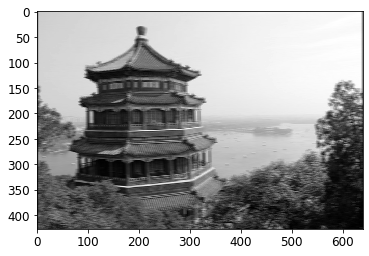

In [22]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

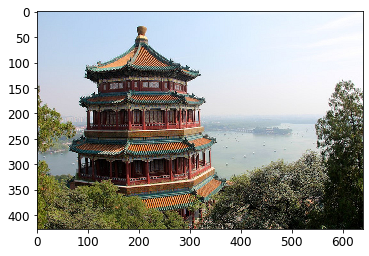

In [23]:
plt.imshow(china)

#### In this example we manually defined the filters, but in a real CNN you would normally define filters as trainable variables so the neural net can learn which filters work best, as explained earlier. Instead of manually creating the variables, we can use the keras.layers.Conv2D layer:
<code>
    conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")
</code>

This code creates a Conv2D layer with 32 filters, each 3 × 3, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs. As we can see, convolutional layers have quite a few hyperparameters: we must choose the number of filters, their height and width, the strides, and the padding type. 

## CNN to tackle the Fashion MNIST

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [25]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1], padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

<code>
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
</code>